In [5]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [6]:
source("/nfs/research/irene/ysong/MY_BIN/ggplot_themes.r")


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [7]:
dd <- read_csv("../batch_metrics_header.csv")

New names:
• `` -> `...1`
Rows: 27 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): ...1, input_h5ad, unintegrated_h5ad, species_key, batch_key, cluste...
dbl (8): NMI_cluster/label, ARI_cluster/label, iLISI, cLISI, graph_conn, pcr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
head(dd)

...1,NMI_cluster/label,ARI_cluster/label,iLISI,cLISI,graph_conn,pcr,silhouette,silhouette_batch,input_h5ad,unintegrated_h5ad,species_key,batch_key,cluster_key,integration_method
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
value,0.9134991,0.9359961,0.2608046,1.0000000,0.9228085,0.7683565,0.6537813,0.9055365,baron_pancreas_metadata_gene_id_many_higher_expr_fastMNN_integrated.h5ad,baron_pancreas_metadata_gene_id_many_higher_expr.h5ad,species,sampleID,cell_type,fastMNN
value,0.8024053,0.6999767,0.2864082,1.0000000,0.9245187,0.8178904,0.6185147,0.8556567,baron_pancreas_metadata_gene_id_many_higher_expr_harmony_integrated.h5ad,baron_pancreas_metadata_gene_id_many_higher_expr.h5ad,species,sampleID,cell_type,harmony
value,0.6862392,0.6037272,0.2783025,0.9975108,0.7409612,0.6762457,0.6166633,0.8009090,baron_pancreas_metadata_gene_id_many_higher_expr_LIGER_integrated.h5ad,baron_pancreas_metadata_gene_id_many_higher_expr.h5ad,species,sampleID,cell_type,LIGER
value,0.9043009,0.9350560,0.1277542,1.0000000,0.9039454,0.6983123,0.5605915,0.9243877,baron_pancreas_metadata_gene_id_many_higher_expr_SAMap_integrated.h5ad,baron_pancreas_metadata_gene_id_many_higher_expr.h5ad,species,sampleID,cell_type,SAMap
value,0.8074062,0.7704332,0.2034148,0.9996249,0.8542010,0.7321296,0.5920459,0.7997700,baron_pancreas_metadata_gene_id_many_higher_expr_scanorama_integrated.h5ad,baron_pancreas_metadata_gene_id_many_higher_expr.h5ad,species,sampleID,cell_type,scanorama
value,0.6328359,0.4492286,0.3570794,0.9463855,0.9314426,0.9156884,0.5775425,0.8589816,baron_pancreas_metadata_gene_id_many_higher_expr_scVI_integrated.h5ad,baron_pancreas_metadata_gene_id_many_higher_expr.h5ad,species,sampleID,cell_type,scVI


In [9]:
tail(dd)

...1,NMI_cluster/label,ARI_cluster/label,iLISI,cLISI,graph_conn,pcr,silhouette,silhouette_batch,input_h5ad,unintegrated_h5ad,species_key,batch_key,cluster_key,integration_method
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
value,0.7826583,0.8171854,0.3467154,0.9788211,0.9444432,0.9154993,0.5743130,0.8595334,baron_pancreas_metadata_gene_id_one2one_only_scVI_integrated.h5ad,baron_pancreas_metadata_gene_id_one2one_only.h5ad,species,sampleID,cell_type,scVI
value,0.8855469,0.9195380,0.2959631,0.9998129,0.9088573,0.9327848,0.6464990,0.7843547,baron_pancreas_metadata_gene_id_one2one_only_seuratCCA_integrated.h5ad,baron_pancreas_metadata_gene_id_one2one_only.h5ad,species,sampleID,cell_type,seuratCCA
value,0.9163110,0.9498562,0.3220763,0.9998490,0.9109786,0.8988461,0.6501141,0.8148757,baron_pancreas_metadata_gene_id_one2one_only_seuratRPCA_integrated.h5ad,baron_pancreas_metadata_gene_id_one2one_only.h5ad,species,sampleID,cell_type,seuratRPCA
value,0.6442515,0.4241909,0.2089601,0.9958296,0.8650676,0.7099297,0.5750408,0.7781833,rliger_uinmf_metadata_many_higher_expr_rligerUINMF_integrated.h5ad,rliger_uinmf_metadata_many_higher_expr.h5ad,species,sampleID,cell_type,rligerUINMF
value,0.5621574,0.4351878,0.2238291,0.9874933,0.8063525,0.7169606,0.5204045,0.7833824,rliger_uinmf_metadata_many_higher_homology_conf_rligerUINMF_integrated.h5ad,rliger_uinmf_metadata_many_higher_homology_conf.h5ad,species,sampleID,cell_type,rligerUINMF
value,0.5693835,0.4106642,0.2147887,0.9919122,0.8236946,0.7159909,0.5272825,0.7842992,rliger_uinmf_metadata_one2one_rligerUINMF_integrated.h5ad,rliger_uinmf_metadata_one2one.h5ad,species,sampleID,cell_type,rligerUINMF


In [10]:
dd[dd == 'rligerUINMF'] = 'LIGER_UINMF'

In [11]:
library(patchwork)
library(ggsci)

In [12]:
pal_npg("nrc")(8)

[1] "#E64B35FF" "#4DBBD5FF" "#00A087FF" "#3C5488FF" "#F39B7FFF" "#8491B4FF"
[7] "#91D1C2FF" "#DC0000FF"

In [13]:
color_pal = c( pal_npg("nrc")(8), "#F4D714")
color_pal

[1] "#E64B35FF" "#4DBBD5FF" "#00A087FF" "#3C5488FF" "#F39B7FFF" "#8491B4FF"
[7] "#91D1C2FF" "#DC0000FF" "#F4D714"

## Batch removal

In [14]:
dd = dd %>% mutate(homology_method = gsub("baron_pancreas_metadata_gene_id_|rliger_uinmf_metadata_", "", input_h5ad)) %>% 
mutate(homology_method = gsub("_fastMNN_integrated.h5ad|_harmony_integrated.h5ad|_LIGER_integrated.h5ad|_scVI_integrated.h5ad|_scanorama_integrated.h5ad|_rligerUINMF_integrated.h5ad|_seuratCCA_integrated.h5ad|_seuratRPCA_integrated.h5ad|_SAMap_integrated.h5ad", "", homology_method)) %>%
arrange(desc(pcr))  %>% 
mutate(homology_method = gsub("one2one_only|one2one", "one2one only", homology_method)) %>% 
mutate(homology_method = gsub("many_higher_expr", "higher expression", homology_method)) %>% 
mutate(homology_method = gsub("many_higher_homology_conf", "stronger homology", homology_method)) %>% 
mutate(homology_method = gsub("full", "all genes", homology_method)) %>% 
mutate(homology_method = factor(homology_method, levels = c("one2one only", 'higher expression', 'stronger homology', 'all genes'))) %>% 
mutate(homology_method = as.character(homology_method))

## minmax scale batch scores

In [15]:
ranked = dd %>% 
mutate(graph_conn_scaled = (graph_conn - min(graph_conn)) / (max(graph_conn) - min(graph_conn))) %>% 
mutate(pcr_scaled = (pcr - min(pcr)) / (max(pcr) - min(pcr))) %>% 
mutate(iLISI_scaled = (iLISI - min(iLISI)) / (max(iLISI) - min(iLISI))) %>% 
mutate(silhouette_batch_scaled = (silhouette_batch - min(silhouette_batch)) / (max(silhouette_batch) - min(silhouette_batch))) %>% 
mutate(avg_score = (graph_conn_scaled + pcr_scaled + iLISI_scaled + silhouette_batch_scaled) * 0.25) %>% 
arrange(desc(avg_score)) %>% 
mutate(cLISI_scaled = (cLISI- min(cLISI)) / (max(cLISI) - min(cLISI))) %>% 
mutate(silhouette_scaled = (silhouette - min(silhouette)) / (max(silhouette) - min(silhouette)))  %>% 
mutate(NMI_scaled = (`NMI_cluster/label` - min(`NMI_cluster/label`)) / (max(`NMI_cluster/label`) - min(`NMI_cluster/label`)))  %>% 
mutate(ARI_scaled = (`ARI_cluster/label` - min(`ARI_cluster/label`)) / (max(`ARI_cluster/label`) - min(`ARI_cluster/label`)))

In [16]:
ranked[which(ranked$integration_method == 'SAMap'), 'homology_method'] = 'full'

In [17]:
## set the order of levels
ranked$homology_method = factor(ranked$homology_method, levels = c("one2one only", 'higher expression', 'stronger homology', 'full'))

In [18]:
batch = ranked %>% arrange(avg_score) %>% mutate(type = paste(integration_method, homology_method, sep = " ")) %>%
ggplot(aes(x = fct_inorder(type), y = avg_score, color= integration_method)) + 
geom_point(aes(shape = fct_inorder(homology_method), size = 2)) + coord_flip() + common_0x + 
scale_color_npg(name = 'integration method') +
labs(x = 'Species mixing score', y = 'integration strategy') + ylim(0,1) + scale_shape(name = 'homology method')

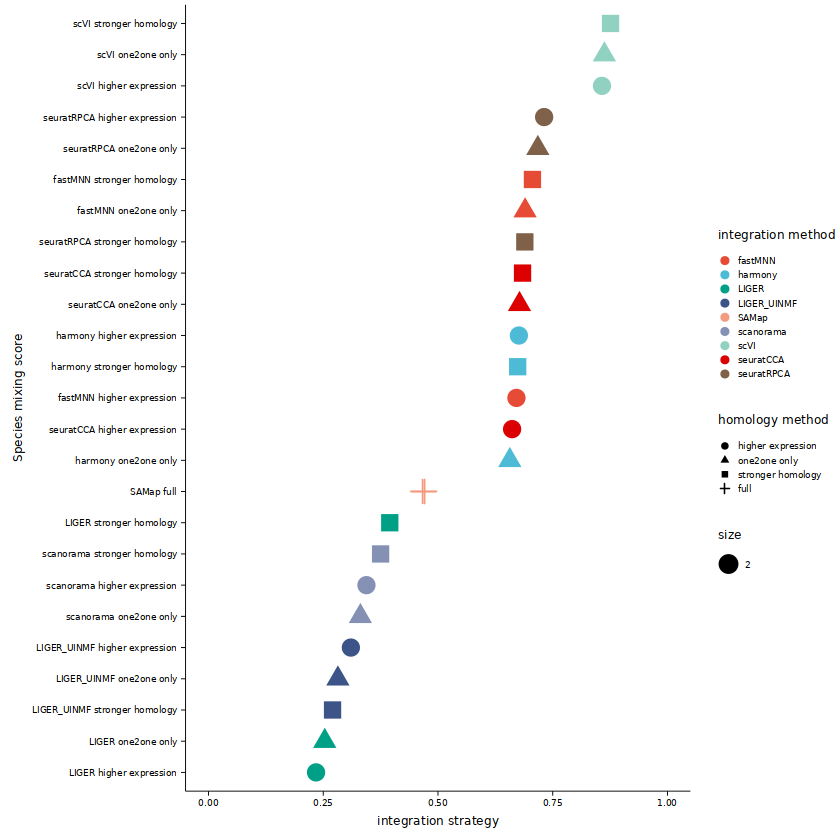

In [19]:
batch

In [20]:
head(ranked)

...1,NMI_cluster/label,ARI_cluster/label,iLISI,cLISI,graph_conn,pcr,silhouette,silhouette_batch,input_h5ad,⋯,homology_method,graph_conn_scaled,pcr_scaled,iLISI_scaled,silhouette_batch_scaled,avg_score,cLISI_scaled,silhouette_scaled,NMI_scaled,ARI_scaled
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
value,0.2840376,0.1542737,0.3694682,0.8699562,0.9174934,0.9218382,0.5762490,0.8704950,baron_pancreas_metadata_gene_id_many_higher_homology_conf_scVI_integrated.h5ad,⋯,stronger homology,0.8547985,0.9573295,1.0000000,0.6917903,0.8759796,0.0000000,0.3558259,0.0000000,0.0000000
value,0.7826583,0.8171854,0.3467154,0.9788211,0.9444432,0.9154993,0.5743130,0.8595334,baron_pancreas_metadata_gene_id_one2one_only_scVI_integrated.h5ad,⋯,one2one only,0.9824002,0.9326201,0.9063013,0.6291018,0.8626059,0.8371400,0.3434903,0.7886156,0.8332407
value,0.6328359,0.4492286,0.3570794,0.9463855,0.9314426,0.9156884,0.5775425,0.8589816,baron_pancreas_metadata_gene_id_many_higher_expr_scVI_integrated.h5ad,⋯,higher expression,0.9208448,0.9333576,0.9489815,0.6259462,0.8572825,0.5877201,0.3640678,0.5516573,0.3707409
value,0.9162844,0.9495825,0.3267255,0.9998447,0.9224760,0.8988973,0.6604056,0.8115786,baron_pancreas_metadata_gene_id_many_higher_expr_seuratRPCA_integrated.h5ad,⋯,higher expression,0.8783900,0.8679048,0.8239807,0.3548507,0.7312816,0.9988062,0.8920486,0.9999579,0.9996560
value,0.9163110,0.9498562,0.3220763,0.9998490,0.9109786,0.8988461,0.6501141,0.8148757,baron_pancreas_metadata_gene_id_one2one_only_seuratRPCA_integrated.h5ad,⋯,one2one only,0.8239519,0.8677055,0.8048346,0.3737066,0.7175497,0.9988386,0.8264742,1.0000000,1.0000000
value,0.9162611,0.9376834,0.2677760,1.0000000,0.9481604,0.7683392,0.6537299,0.9039447,baron_pancreas_metadata_gene_id_many_higher_homology_conf_fastMNN_integrated.h5ad,⋯,stronger homology,1.0000000,0.3589843,0.5812198,0.8830876,0.7058229,1.0000000,0.8495129,0.9999210,0.9846995


## Biology conservation

In [21]:
cs <- read_csv("/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Baron_pancreas_results_final/results/all_SCCAF_no_t.csv")

Rows: 1012 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): cell_type, type_label, from_species, to_species, integration_method...
dbl (6): ROC_AUC, PR_AUC, test_acc, CV_acc, adj_rand_score, pct_cell_type_kept

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [22]:
cs[cs$integration_method == 'SAMap', 'homology_method'] = 'full'
cs[cs == 'hs'] = 'hsapiens'
cs[cs == 'mm'] = 'mmusculus'
cs[cs == 'one2one'] = 'one2one_only'

In [23]:
levels(factor(cs$integration_method))
levels(factor(cs$homology_method))

[1] "fastMNN"      "harmony"      "LIGER"        "rligerUINMF"  "SAMap"       
 [6] "scanorama"    "scVI"         "seuratCCA"    "seuratRPCA"   "unintegrated"

[1] "full"

In [24]:
orig = cs %>% filter(integration_method == 'unintegrated')

In [25]:
intg = cs %>% filter(integration_method != 'unintegrated') %>% filter(type_label == 'original')

In [26]:
intg = intg %>% mutate(homology_method = gsub("baron_pancreas_metadata_gene_id_|rliger_uinmf_metadata_", "", input_file)) %>% 
mutate(homology_method = gsub("_fastMNN_integrated.h5ad|_harmony_integrated.h5ad|_LIGER_integrated.h5ad|_scVI_integrated.h5ad|_scanorama_integrated.h5ad|_rligerUINMF_integrated.h5ad|_seuratCCA_integrated.h5ad|_seuratRPCA_integrated.h5ad", "", homology_method)) %>%
mutate(homology_method = gsub("one2one_only|one2one", "one2one only", homology_method)) %>% 
mutate(homology_method = gsub("many_higher_expr", "higher expression", homology_method)) %>% 
mutate(homology_method = gsub("many_higher_homology_conf", "stronger homology", homology_method)) %>% 
mutate(homology_method = gsub("full", "all genes", homology_method))
intg[intg$integration_method == 'SAMap', 'homology_method'] = 'full'

In [27]:
head(intg)

cell_type,ROC_AUC,PR_AUC,test_acc,CV_acc,type_label,from_species,to_species,integration_method,input_file,key_use,adj_rand_score,pct_cell_type_kept,homology_method
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
T_cell,0.4625152,0.9881548,0.9765784,0.9541841,original,hsapiens,hsapiens,fastMNN,baron_pancreas_metadata_gene_id_many_higher_expr_fastMNN_integrated.h5ad,cell_type,NaN,NaN,higher expression
acinar,0.9984545,0.9997441,0.9765784,0.9541841,original,hsapiens,hsapiens,fastMNN,baron_pancreas_metadata_gene_id_many_higher_expr_fastMNN_integrated.h5ad,cell_type,NaN,NaN,higher expression
activated_stellate,0.9875598,0.9994431,0.9765784,0.9541841,original,hsapiens,hsapiens,fastMNN,baron_pancreas_metadata_gene_id_many_higher_expr_fastMNN_integrated.h5ad,cell_type,NaN,NaN,higher expression
alpha,0.9984528,0.9994562,0.9765784,0.9541841,original,hsapiens,hsapiens,fastMNN,baron_pancreas_metadata_gene_id_many_higher_expr_fastMNN_integrated.h5ad,cell_type,NaN,NaN,higher expression
beta,0.9998136,0.9999073,0.9765784,0.9541841,original,hsapiens,hsapiens,fastMNN,baron_pancreas_metadata_gene_id_many_higher_expr_fastMNN_integrated.h5ad,cell_type,NaN,NaN,higher expression
delta,0.9980104,0.9998492,0.9765784,0.9541841,original,hsapiens,hsapiens,fastMNN,baron_pancreas_metadata_gene_id_many_higher_expr_fastMNN_integrated.h5ad,cell_type,NaN,NaN,higher expression


## accuracy loss

In [28]:
acc_loss = merge(orig, intg, by = c("cell_type", "from_species"), suffixes = c("_orig", "_intg")) %>% 
mutate(acc_loss = abs(test_acc_orig - test_acc_intg))

In [29]:
head(acc_loss)

,cell_type,from_species,ROC_AUC_orig,PR_AUC_orig,test_acc_orig,CV_acc_orig,type_label_orig,to_species_orig,integration_method_orig,input_file_orig,⋯,CV_acc_intg,type_label_intg,to_species_intg,integration_method_intg,input_file_intg,key_use_intg,adj_rand_score_intg,pct_cell_type_kept_intg,homology_method_intg,acc_loss
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
1,acinar,hsapiens,0.9997337,0.9999558,0.9874159,0.988577,original,hsapiens,unintegrated,/nfs/research/irene/ysong/DATA/CrossSpeciesIntegration/Baron_pancreas/hsapiens_cell_ontology_mapped_gene_id.h5ad,⋯,0.9738241,original,hsapiens,seuratRPCA,baron_pancreas_metadata_gene_id_many_higher_expr_seuratRPCA_integrated.h5ad,cell_type,NaN,NaN,higher expression,0.0005086754
2,acinar,hsapiens,0.9997337,0.9999558,0.9874159,0.988577,original,hsapiens,unintegrated,/nfs/research/irene/ysong/DATA/CrossSpeciesIntegration/Baron_pancreas/hsapiens_cell_ontology_mapped_gene_id.h5ad,⋯,0.9633473,original,hsapiens,harmony,baron_pancreas_metadata_gene_id_one2one_only_harmony_integrated.h5ad,cell_type,NaN,NaN,one2one only,0.0118557804
3,acinar,hsapiens,0.9997337,0.9999558,0.9874159,0.988577,original,hsapiens,unintegrated,/nfs/research/irene/ysong/DATA/CrossSpeciesIntegration/Baron_pancreas/hsapiens_cell_ontology_mapped_gene_id.h5ad,⋯,0.9705518,original,hsapiens,harmony,baron_pancreas_metadata_gene_id_many_higher_expr_harmony_integrated.h5ad,cell_type,NaN,NaN,higher expression,0.0082188878
4,acinar,hsapiens,0.9997337,0.9999558,0.9874159,0.988577,original,hsapiens,unintegrated,/nfs/research/irene/ysong/DATA/CrossSpeciesIntegration/Baron_pancreas/hsapiens_cell_ontology_mapped_gene_id.h5ad,⋯,0.9777478,original,hsapiens,scVI,baron_pancreas_metadata_gene_id_many_higher_homology_conf_scVI_integrated.h5ad,cell_type,NaN,NaN,stronger homology,0.0038546166
5,acinar,hsapiens,0.9997337,0.9999558,0.9874159,0.988577,original,hsapiens,unintegrated,/nfs/research/irene/ysong/DATA/CrossSpeciesIntegration/Baron_pancreas/hsapiens_cell_ontology_mapped_gene_id.h5ad,⋯,0.9541841,original,hsapiens,fastMNN,baron_pancreas_metadata_gene_id_many_higher_expr_fastMNN_integrated.h5ad,cell_type,NaN,NaN,higher expression,0.0108374505
6,acinar,hsapiens,0.9997337,0.9999558,0.9874159,0.988577,original,hsapiens,unintegrated,/nfs/research/irene/ysong/DATA/CrossSpeciesIntegration/Baron_pancreas/hsapiens_cell_ontology_mapped_gene_id.h5ad,⋯,0.9712140,original,hsapiens,seuratRPCA,baron_pancreas_metadata_gene_id_one2one_only_seuratRPCA_integrated.h5ad,cell_type,NaN,NaN,one2one only,0.0035636652


In [30]:
ranked_dd = ranked %>% select(integration_method, homology_method, cLISI_scaled, silhouette_scaled, NMI_scaled, ARI_scaled) %>% 
mutate(cLISI_scaled_rank = dense_rank(desc(cLISI_scaled))) %>% 
mutate(silhouette_scaled_rank = dense_rank(desc(silhouette_scaled))) %>%
mutate(ARI_scaled_rank = dense_rank(desc(ARI_scaled))) %>%
mutate(NMI_scaled_rank = dense_rank(desc(NMI_scaled))) %>% 
mutate(type = paste(integration_method, homology_method, sep = " ")) %>% distinct(type, .keep_all = TRUE)

In [31]:
## min max scale accuracy loss

acc_loss_dd = acc_loss %>% select(homology_method_intg,integration_method_intg, acc_loss) %>% mutate(integration_method_intg = gsub("rligerUINMF", "LIGER_UINMF",integration_method_intg)) %>%  
mutate(homology_method = factor(homology_method_intg, levels = c('full', "one2one only", 'higher expression', 'stronger homology'))) %>% 
group_by(integration_method_intg, homology_method) %>% 
mutate(acc_loss = ifelse(acc_loss < 0, 0, acc_loss)) %>% 
mutate(acc_avg = abs(mean(acc_loss, na.rm = TRUE))) %>% ungroup() %>% 
mutate(acc_loss_scaled = 1- ((acc_avg - min(acc_avg)) / max(acc_avg) - min(acc_avg)))%>% 
mutate(type = paste(integration_method_intg, homology_method, sep = " ")) %>% ungroup() %>% 
mutate(acc_loss_scaled_rank = dense_rank(desc(acc_loss_scaled))) %>% distinct(type, .keep_all = TRUE) %>% 
mutate(integration_method = integration_method_intg)

In [32]:
acc_loss_dd

homology_method_intg,integration_method_intg,acc_loss,homology_method,acc_avg,acc_loss_scaled,type,acc_loss_scaled_rank,integration_method
<chr>,<chr>,<dbl>,<fct>,<dbl>,<dbl>,<chr>,<int>,<chr>
higher expression,seuratRPCA,0.0005086754,higher expression,0.004515430,0.991109950,seuratRPCA higher expression,3,seuratRPCA
one2one only,harmony,0.0118557804,one2one only,0.008038930,0.980008763,harmony one2one only,7,harmony
higher expression,harmony,0.0082188878,higher expression,0.005821684,0.986994451,harmony higher expression,5,harmony
stronger homology,scVI,0.0038546166,stronger homology,0.007462828,0.981823840,scVI stronger homology,6,scVI
higher expression,fastMNN,0.0108374505,higher expression,0.014751515,0.958859998,fastMNN higher expression,14,fastMNN
one2one only,seuratRPCA,0.0035636652,one2one only,0.003069263,0.995666264,seuratRPCA one2one only,2,seuratRPCA
higher expression,scVI,0.0003631997,higher expression,0.008265972,0.979293441,scVI higher expression,8,scVI
one2one only,seuratCCA,0.0104010233,one2one only,0.020055817,0.942148193,seuratCCA one2one only,17,seuratCCA
higher expression,LIGER_UINMF,0.0530254051,higher expression,0.113585510,0.647472238,LIGER_UINMF higher expression,22,LIGER_UINMF


## merge acc_loss and bio metrics

In [33]:
bio_dd = merge(ranked_dd, acc_loss_dd, by = c("type", "integration_method", "homology_method"))

In [34]:
bio_dd =  bio_dd %>% 
mutate(avg_score = acc_loss_scaled * 0.8 + silhouette_scaled*0.05 + cLISI_scaled*0.05 + ARI_scaled*0.05 + NMI_scaled*0.05) %>% 
arrange(desc(avg_score)) 

In [35]:
bio_dd

type,integration_method,homology_method,cLISI_scaled,silhouette_scaled,NMI_scaled,ARI_scaled,cLISI_scaled_rank,silhouette_scaled_rank,ARI_scaled_rank,NMI_scaled_rank,homology_method_intg,integration_method_intg,acc_loss,acc_avg,acc_loss_scaled,acc_loss_scaled_rank,avg_score
<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
seuratRPCA stronger homology,seuratRPCA,stronger homology,1.0000000,0.88688879,0.9938882,0.9971070,1,4,3,6,stronger homology,seuratRPCA,0.0025453352,0.001285672,1.001285672,1,0.9949227
seuratRPCA one2one only,seuratRPCA,one2one only,0.9988386,0.82647420,1.0000000,1.0000000,3,8,1,1,one2one only,seuratRPCA,0.0035636652,0.003069263,0.995666264,2,0.9877986
seuratRPCA higher expression,seuratRPCA,higher expression,0.9988062,0.89204864,0.9999579,0.9996560,4,3,2,2,higher expression,seuratRPCA,0.0005086754,0.004515430,0.991109950,3,0.9874114
fastMNN one2one only,fastMNN,one2one only,1.0000000,0.84502211,0.9977267,0.9831633,1,7,5,4,one2one only,fastMNN,0.0060367522,0.013200784,0.963745755,13,0.9622922
fastMNN higher expression,fastMNN,higher expression,1.0000000,0.84984044,0.9955527,0.9825787,1,5,6,5,higher expression,fastMNN,0.0108374505,0.014751515,0.958859998,14,0.9584866
fastMNN stronger homology,fastMNN,stronger homology,1.0000000,0.84951286,0.9999210,0.9846995,1,6,4,3,stronger homology,fastMNN,0.0090917420,0.016002705,0.954917982,16,0.9556411
harmony stronger homology,harmony,stronger homology,1.0000000,0.62263187,0.8288504,0.6987973,1,12,16,14,stronger homology,harmony,0.0072005578,0.004861701,0.990018985,4,0.9495292
harmony higher expression,harmony,higher expression,1.0000000,0.62513156,0.8198473,0.6859163,1,11,17,16,higher expression,harmony,0.0082188878,0.005821684,0.986994451,5,0.9461403
harmony one2one only,harmony,one2one only,0.9997679,0.52205222,0.8347507,0.7653792,2,14,15,13,one2one only,harmony,0.0118557804,0.008038930,0.980008763,7,0.9401045


In [36]:
bio = bio_dd %>%
ggplot(aes(x = fct_inorder(type), y = acc_loss_scaled, color= integration_method_intg)) + 
geom_point(aes(shape = fct_inorder(homology_method), size = 2)) + coord_flip() + common_0x + 
scale_color_npg(name = 'integration method') +
labs(x = 'Biology conservation score', y = 'integration strategy') + scale_shape(name = 'homology method') 

In [37]:
library(cowplot)


Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots


The following object is masked from ‘package:ggpubr’:

    get_legend




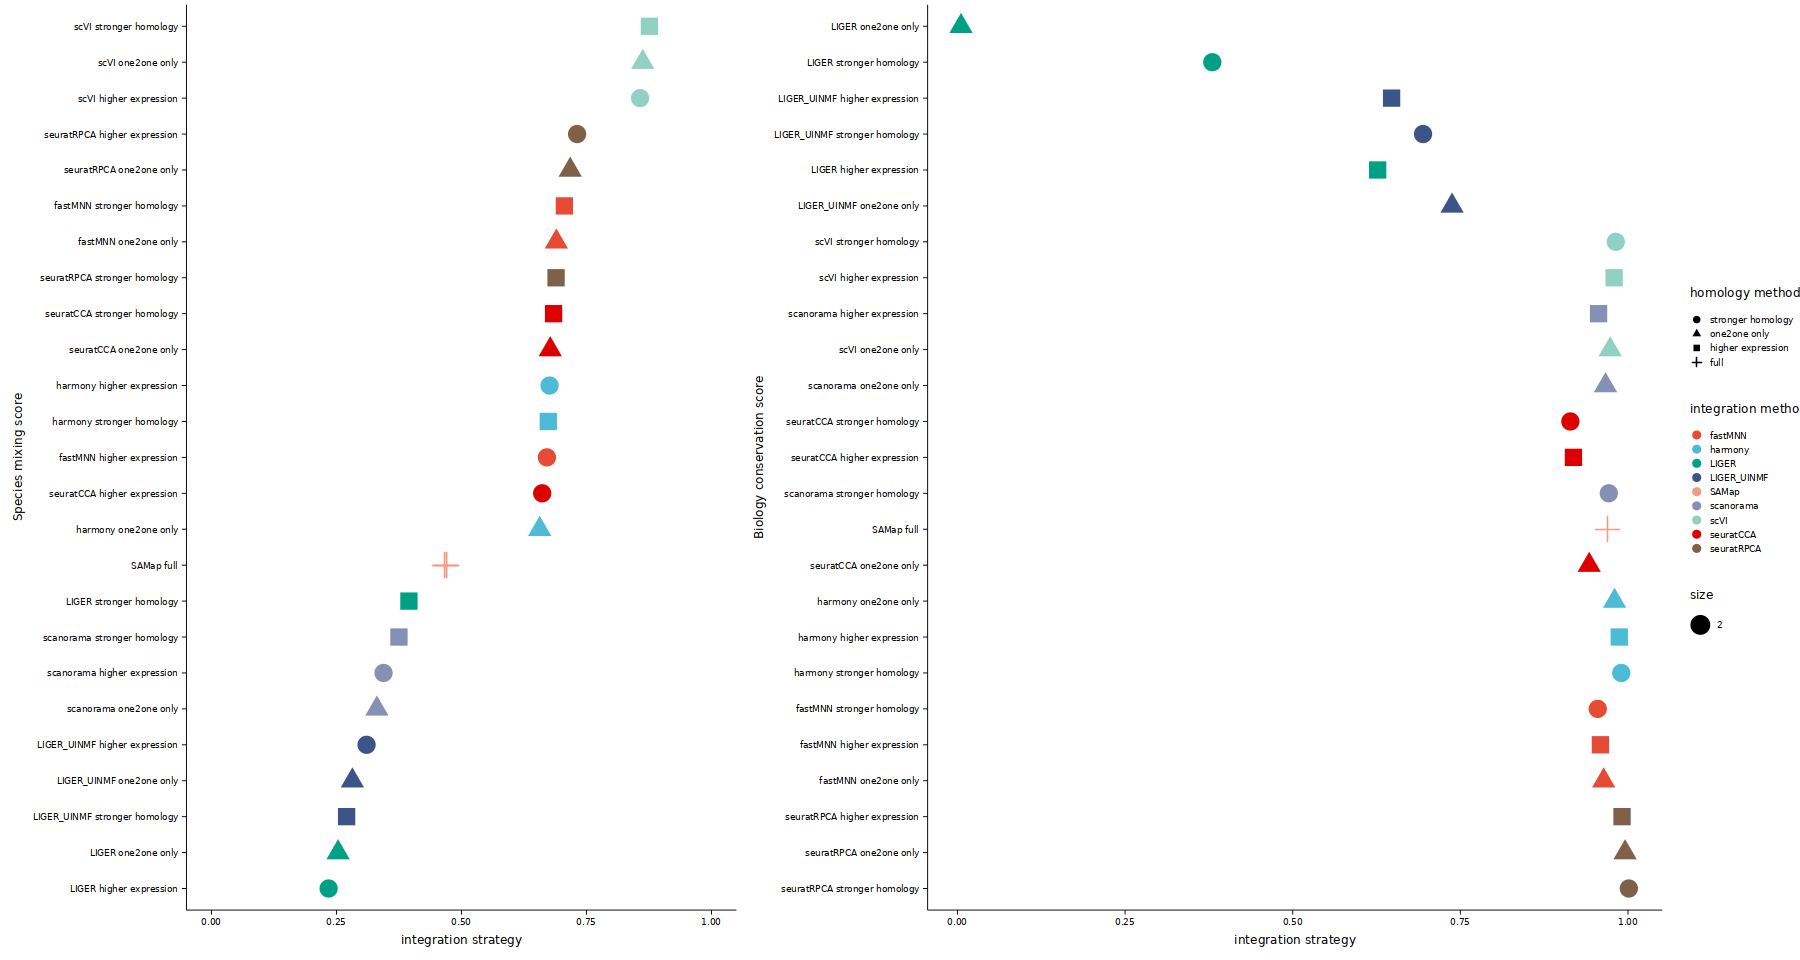

In [38]:
options(repr.plot.width = 15, repr.plot.height = 8)
plot_grid(batch + theme(legend.position = 'none'), bio, rel_widths = c(0.7, 1))

## overall ranking

In [39]:
batch_ranking = ranked %>% mutate(type = paste(integration_method, homology_method, sep = " ")) %>%
select(type, avg_score, integration_method, homology_method)

In [40]:
bio_ranking = bio_dd

In [41]:
merged = merge(batch_ranking, bio_ranking, by = 'type', suffixes = c("_batch", "_bio")) %>% distinct(type, .keep_all = TRUE) %>% 
mutate(total_score = 0.4*avg_score_batch + 0.6*avg_score_bio) %>% arrange(desc(total_score)) %>% 
mutate(ranking = seq(from = 1, to = nrow(.)))  

merged

type,avg_score_batch,integration_method_batch,homology_method_batch,integration_method_bio,homology_method_bio,cLISI_scaled,silhouette_scaled,NMI_scaled,ARI_scaled,⋯,NMI_scaled_rank,homology_method_intg,integration_method_intg,acc_loss,acc_avg,acc_loss_scaled,acc_loss_scaled_rank,avg_score_bio,total_score,ranking
<chr>,<dbl>,<chr>,<fct>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>
scVI one2one only,0.8626059,scVI,one2one only,scVI,one2one only,0.8371400,0.34349028,0.7886156,0.8332407,⋯,17,one2one only,scVI,0.0057458008,0.010107655,0.973491009,9,0.9189171,0.8963926,1
seuratRPCA higher expression,0.7312816,seuratRPCA,higher expression,seuratRPCA,higher expression,0.9988062,0.89204864,0.9999579,0.9996560,⋯,2,higher expression,seuratRPCA,0.0005086754,0.004515430,0.991109950,3,0.9874114,0.8849595,2
seuratRPCA one2one only,0.7175497,seuratRPCA,one2one only,seuratRPCA,one2one only,0.9988386,0.82647420,1.0000000,1.0000000,⋯,1,one2one only,seuratRPCA,0.0035636652,0.003069263,0.995666264,2,0.9877986,0.8796991,3
seuratRPCA stronger homology,0.6892149,seuratRPCA,stronger homology,seuratRPCA,stronger homology,1.0000000,0.88688879,0.9938882,0.9971070,⋯,6,stronger homology,seuratRPCA,0.0025453352,0.001285672,1.001285672,1,0.9949227,0.8726396,4
scVI higher expression,0.8572825,scVI,higher expression,scVI,higher expression,0.5877201,0.36406781,0.5516573,0.3707409,⋯,21,higher expression,scVI,0.0003631997,0.008265972,0.979293441,8,0.8771441,0.8691994,5
fastMNN stronger homology,0.7058229,fastMNN,stronger homology,fastMNN,stronger homology,1.0000000,0.84951286,0.9999210,0.9846995,⋯,3,stronger homology,fastMNN,0.0090917420,0.016002705,0.954917982,16,0.9556411,0.8557138,6
fastMNN one2one only,0.6898148,fastMNN,one2one only,fastMNN,one2one only,1.0000000,0.84502211,0.9977267,0.9831633,⋯,4,one2one only,fastMNN,0.0060367522,0.013200784,0.963745755,13,0.9622922,0.8533013,7
fastMNN higher expression,0.6709294,fastMNN,higher expression,fastMNN,higher expression,1.0000000,0.84984044,0.9955527,0.9825787,⋯,5,higher expression,fastMNN,0.0108374505,0.014751515,0.958859998,14,0.9584866,0.8434637,8
harmony stronger homology,0.6736684,harmony,stronger homology,harmony,stronger homology,1.0000000,0.62263187,0.8288504,0.6987973,⋯,14,stronger homology,harmony,0.0072005578,0.004861701,0.990018985,4,0.9495292,0.8391849,9


In [42]:
order_type = levels(factor(merged$type, levels = merged$type))

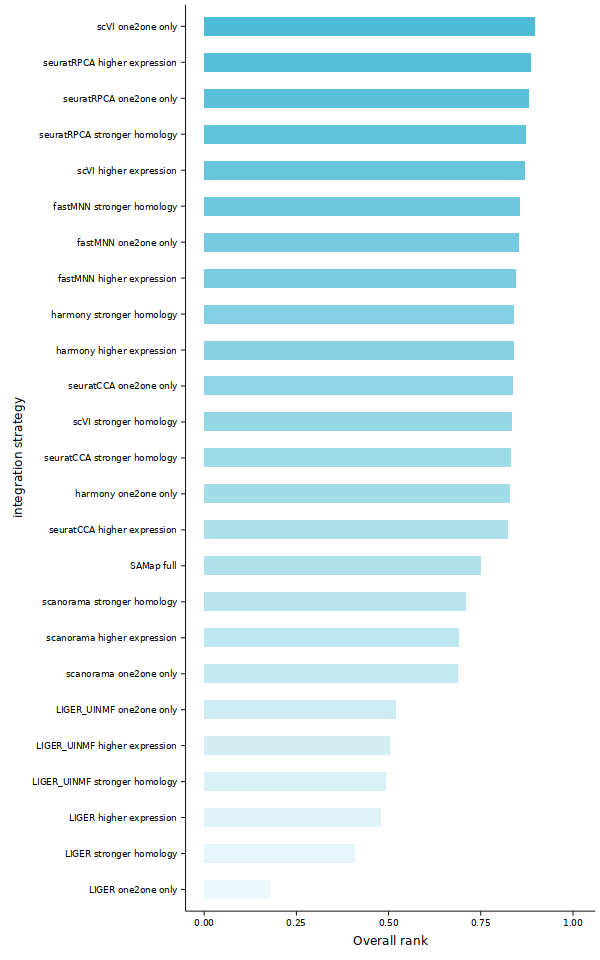

In [43]:
options(repr.plot.width = 5, repr.plot.height = 8)

merged  %>% 
ggplot(aes(x = factor(type, levels = order_type), y = total_score, alpha = ranking)) + 
geom_bar(stat = 'identity',  fill = "#4DBBD5B2", width = 0.5) + coord_flip() + common_0x   +
labs(y = 'Overall rank', x = 'integration strategy') +
  scale_alpha(trans = reverse_trans()) + 
scale_x_discrete(limits = rev) + theme(panel.background = element_blank(), legend.position = 'none') +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01))

overall = merged %>% 
ggplot(aes(x = factor(type, levels = order_type), y = total_score, alpha = ranking)) + 
geom_bar(stat = 'identity',  fill = "#4DBBD5B2", width = 0.5) + coord_flip() + common_0x  +
labs(y = 'Overall score', x = 'integration strategy') +
  scale_alpha(trans = reverse_trans()) +
scale_x_discrete(limits = rev) + theme(panel.background = element_blank(), legend.position = 'none') +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01))

## batch ranking

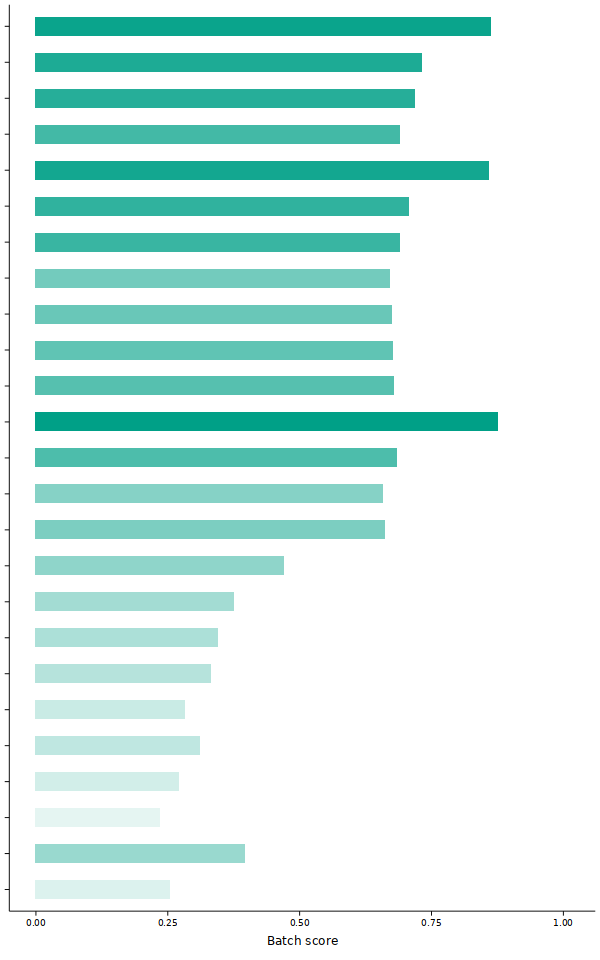

In [41]:
options(repr.plot.width = 5, repr.plot.height = 8)

ranked %>% mutate(type = paste(integration_method, homology_method, sep = " ")) %>% distinct(type, .keep_all = TRUE) %>% 
select(iLISI_scaled, graph_conn_scaled, pcr_scaled, silhouette_batch_scaled, avg_score, type, homology_method,integration_method ) %>% 
ungroup() %>% 
mutate(avg_score_rank = dense_rank(desc(avg_score))) %>% 
ggplot(aes(x = factor(type, levels = order_type), y = avg_score, alpha = avg_score_rank)) + 
geom_bar(stat = 'identity',  fill = "#00A087B2", width = 0.5) + coord_flip() + common_0x  +
labs(y = 'Batch score', x = 'integration strategy') +  scale_alpha(trans = reverse_trans()) +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01)) + 
scale_x_discrete(limits = rev) + 
theme(axis.text.y = element_blank(), axis.title.y = element_blank(), panel.background = element_blank(), legend.position = 'none')


batch_overall = ranked %>% mutate(type = paste(integration_method, homology_method, sep = " ")) %>% distinct(type, .keep_all = TRUE) %>% 
select(iLISI_scaled, graph_conn_scaled, pcr_scaled, silhouette_batch_scaled, avg_score, type, homology_method,integration_method ) %>% 
ungroup() %>% 
mutate(avg_score_rank = dense_rank(desc(avg_score))) %>% 
ggplot(aes(x = factor(type, levels = order_type), y = avg_score, alpha = avg_score_rank)) + 
geom_bar(stat = 'identity',  fill = "#00A087B2", width = 0.5) + coord_flip() + common_0x  +
labs(y = 'Batch score', x = 'integration strategy') +  scale_alpha(trans = reverse_trans()) +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01)) + 
scale_x_discrete(limits = rev) + 
theme(axis.text.y = element_blank(), axis.title.y = element_blank(), panel.background = element_blank(), legend.position = 'none')

## batch scores

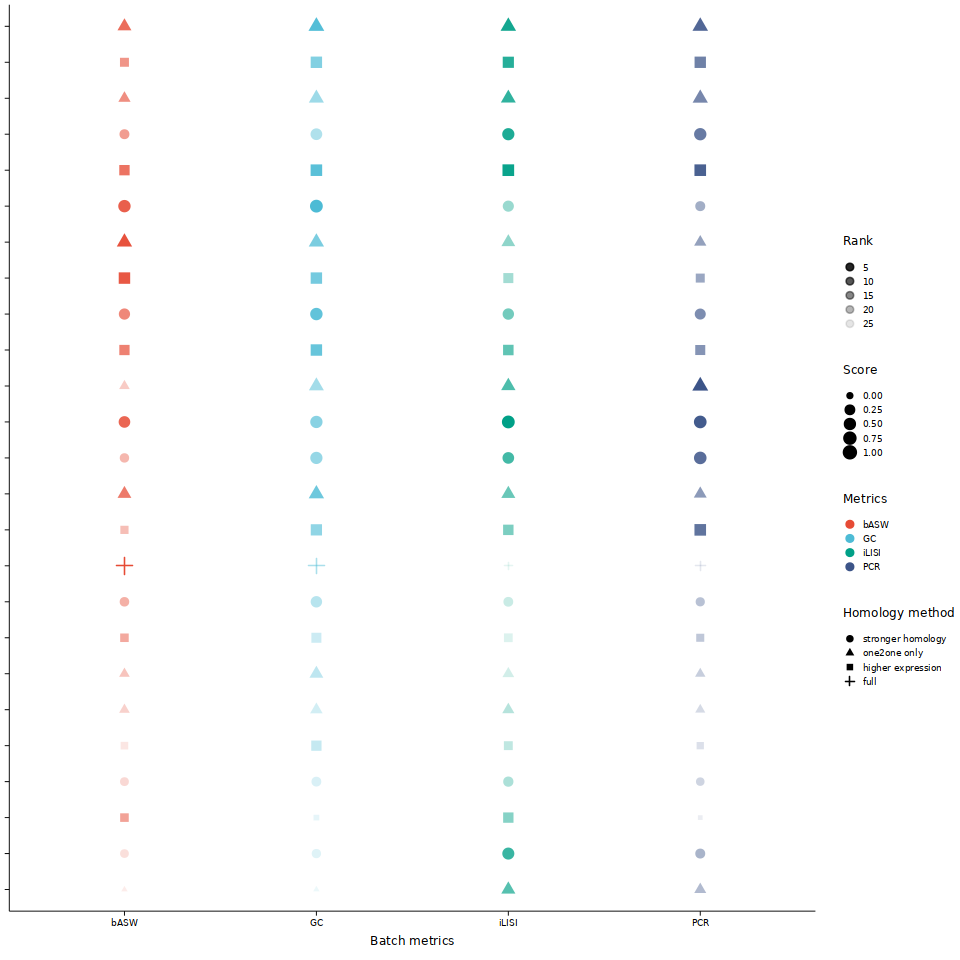

In [42]:
options(repr.plot.width = 8, repr.plot.height = 8)

ranked %>% mutate(type = paste(integration_method, homology_method, sep = " ")) %>% distinct(type, .keep_all = TRUE) %>% 
select(iLISI_scaled, graph_conn_scaled, pcr_scaled, silhouette_batch_scaled, avg_score, type, homology_method,integration_method ) %>% 
ungroup() %>% 
mutate(iLISI_scaled_rank = dense_rank(desc(iLISI_scaled)))%>% 
mutate(graph_conn_scaled_rank = dense_rank(desc(graph_conn_scaled)))%>% 
mutate(pcr_scaled_rank = dense_rank(desc(pcr_scaled)))%>% 
mutate(silhouette_batch_scaled_rank = dense_rank(desc(silhouette_batch_scaled))) %>% 
pivot_longer(cols = (ends_with('rank')), names_to = 'Metrics', values_to = 'ranks') %>% 
mutate(scores = ifelse(grepl("iLISI", Metrics), iLISI_scaled, ifelse(grepl("graph", Metrics), graph_conn_scaled, ifelse(grepl("silhoue", Metrics), silhouette_batch_scaled, pcr_scaled)))) %>%
mutate(Metrics = gsub("graph_conn_scaled_rank", "GC", Metrics)) %>% 
mutate(Metrics = gsub("iLISI_scaled_rank", "iLISI", Metrics)) %>% 
mutate(Metrics = gsub("pcr_scaled_rank", "PCR", Metrics)) %>% 
mutate(Metrics = gsub("silhouette_batch_scaled_rank", "bASW", Metrics)) %>% 
ggplot(aes(x = factor(type, levels = order_type), y = Metrics, alpha = ranks, color = Metrics, size = scores)) + 
geom_point(aes(shape = fct_inorder(homology_method))) + coord_flip() + common_0x    +  
theme(axis.text.y = element_blank(), 
      axis.title.y = element_blank(),  
      panel.background = element_blank()) + scale_color_npg(name = 'Metrics') + 
scale_shape_discrete(name = 'Homology method') + 
scale_alpha_continuous(name = 'Rank', trans = reverse_trans()) + 
scale_x_discrete(limits = rev) +
scale_size_continuous(name = 'Score',  range = c(1, 3)) + labs(y = 'Batch metrics') 

In [43]:
batch_detail = ranked %>% mutate(type = paste(integration_method, homology_method, sep = " ")) %>% distinct(type, .keep_all = TRUE) %>% 
select(iLISI_scaled, graph_conn_scaled, pcr_scaled, silhouette_batch_scaled, avg_score, type, homology_method,integration_method ) %>% 
ungroup() %>% 
mutate(iLISI_scaled_rank = dense_rank(desc(iLISI_scaled)))%>% 
mutate(graph_conn_scaled_rank = dense_rank(desc(graph_conn_scaled)))%>% 
mutate(pcr_scaled_rank = dense_rank(desc(pcr_scaled)))%>% 
mutate(silhouette_batch_scaled_rank = dense_rank(desc(silhouette_batch_scaled))) %>% 
pivot_longer(cols = (ends_with('rank')), names_to = 'Metrics', values_to = 'ranks') %>% 
mutate(scores = ifelse(grepl("iLISI", Metrics), iLISI_scaled, ifelse(grepl("graph", Metrics), graph_conn_scaled, ifelse(grepl("silhoue", Metrics), silhouette_batch_scaled, pcr_scaled)))) %>%
mutate(Metrics = gsub("graph_conn_scaled_rank", "GC", Metrics)) %>% 
mutate(Metrics = gsub("iLISI_scaled_rank", "iLISI", Metrics)) %>% 
mutate(Metrics = gsub("pcr_scaled_rank", "PCR", Metrics)) %>% 
mutate(Metrics = gsub("silhouette_batch_scaled_rank", "bASW", Metrics)) %>% 
ggplot(aes(x = factor(type, levels = order_type), y = Metrics, alpha = ranks, color = Metrics, size = scores)) + 
geom_point(aes(shape = fct_inorder(homology_method))) + coord_flip() + common_0x    +  
theme(axis.text.y = element_blank(), 
      axis.title.y = element_blank(),  
      panel.background = element_blank()) + scale_color_npg(name = 'Metrics') + 
scale_shape_discrete(name = 'Homology method') + 
scale_alpha_continuous(name = 'Rank', trans = reverse_trans()) +
scale_x_discrete(limits = rev) +
scale_size_continuous(name = 'Score',  range = c(1, 3)) + labs(y = 'Batch metrics')

## Bio ranking

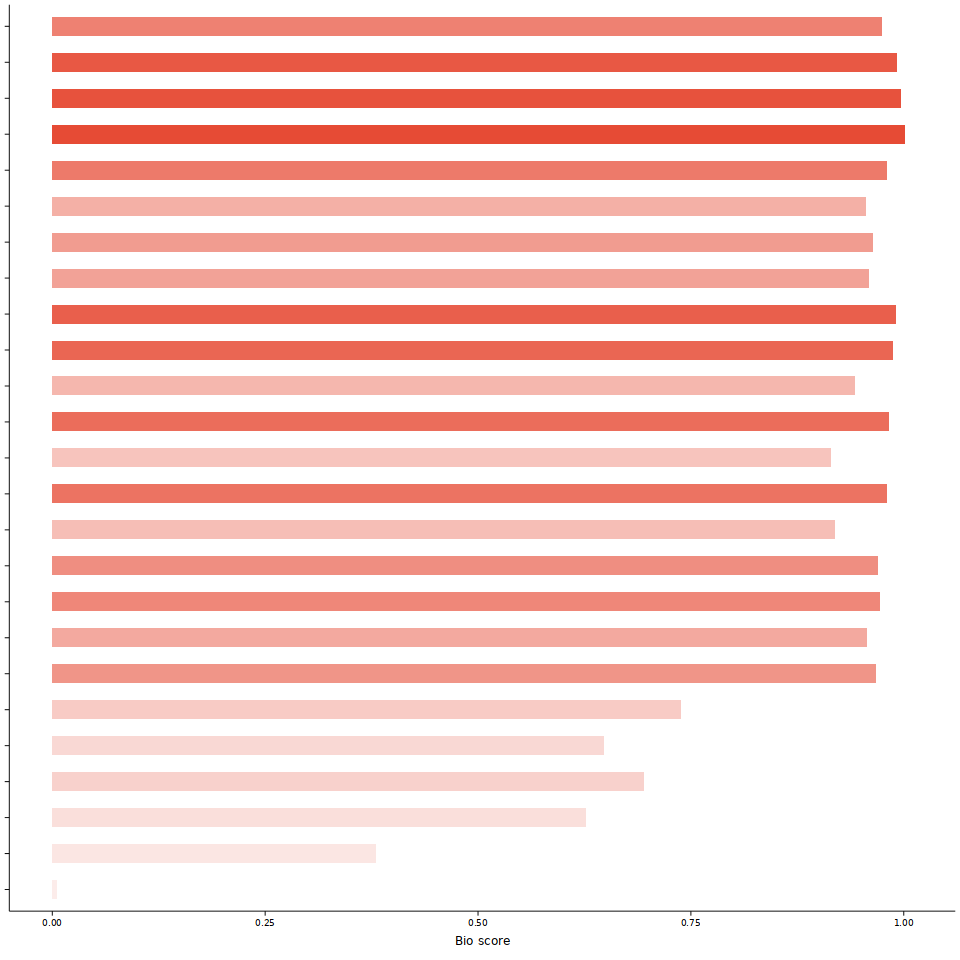

In [44]:
bio_ranking%>%
ggplot(aes(x = factor(type, levels = order_type), y = acc_loss_scaled, alpha =acc_loss_scaled_rank)) + 
geom_bar(stat = 'identity',  fill = "#E64B3599", width  = 0.5) + coord_flip() + common_0x  +
labs(y = 'Bio score', x = 'integration strategy') +
scale_x_discrete(limits = rev) + scale_alpha_continuous(name = 'Rank', trans = reverse_trans()) +
theme(axis.text.y = element_blank(), axis.title.y = element_blank(), 
      panel.background = element_blank(), legend.position = 'none') + 
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01))

In [45]:
bio_overall = bio_ranking%>%
ggplot(aes(x = factor(type, levels = order_type), y = acc_loss_scaled, alpha =acc_loss_scaled_rank)) + 
geom_bar(stat = 'identity',  fill = "#E64B3599", width  = 0.5) + coord_flip() + common_0x  +
labs(y = 'Bio score', x = 'integration strategy') +
scale_x_discrete(limits = rev) + scale_alpha_continuous(name = 'Rank', trans = reverse_trans()) +
theme(axis.text.y = element_blank(), axis.title.y = element_blank(), 
      panel.background = element_blank(), legend.position = 'none') +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01))

## Bio scores

In [46]:
head(bio_ranking)

,type,integration_method,homology_method,cLISI_scaled,silhouette_scaled,NMI_scaled,ARI_scaled,cLISI_scaled_rank,silhouette_scaled_rank,ARI_scaled_rank,NMI_scaled_rank,homology_method_intg,integration_method_intg,acc_loss,acc_avg,acc_loss_scaled,acc_loss_scaled_rank,avg_score
,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,seuratRPCA stronger homology,seuratRPCA,stronger homology,1.0000000,0.8868888,0.9938882,0.9971070,1,4,3,6,stronger homology,seuratRPCA,0.0025453352,0.001285672,1.0012857,1,0.9949227
2,seuratRPCA one2one only,seuratRPCA,one2one only,0.9988386,0.8264742,1.0000000,1.0000000,3,8,1,1,one2one only,seuratRPCA,0.0035636652,0.003069263,0.9956663,2,0.9877986
3,seuratRPCA higher expression,seuratRPCA,higher expression,0.9988062,0.8920486,0.9999579,0.9996560,4,3,2,2,higher expression,seuratRPCA,0.0005086754,0.004515430,0.9911100,3,0.9874114
4,fastMNN one2one only,fastMNN,one2one only,1.0000000,0.8450221,0.9977267,0.9831633,1,7,5,4,one2one only,fastMNN,0.0060367522,0.013200784,0.9637458,13,0.9622922
5,fastMNN higher expression,fastMNN,higher expression,1.0000000,0.8498404,0.9955527,0.9825787,1,5,6,5,higher expression,fastMNN,0.0108374505,0.014751515,0.9588600,14,0.9584866
6,fastMNN stronger homology,fastMNN,stronger homology,1.0000000,0.8495129,0.9999210,0.9846995,1,6,4,3,stronger homology,fastMNN,0.0090917420,0.016002705,0.9549180,16,0.9556411


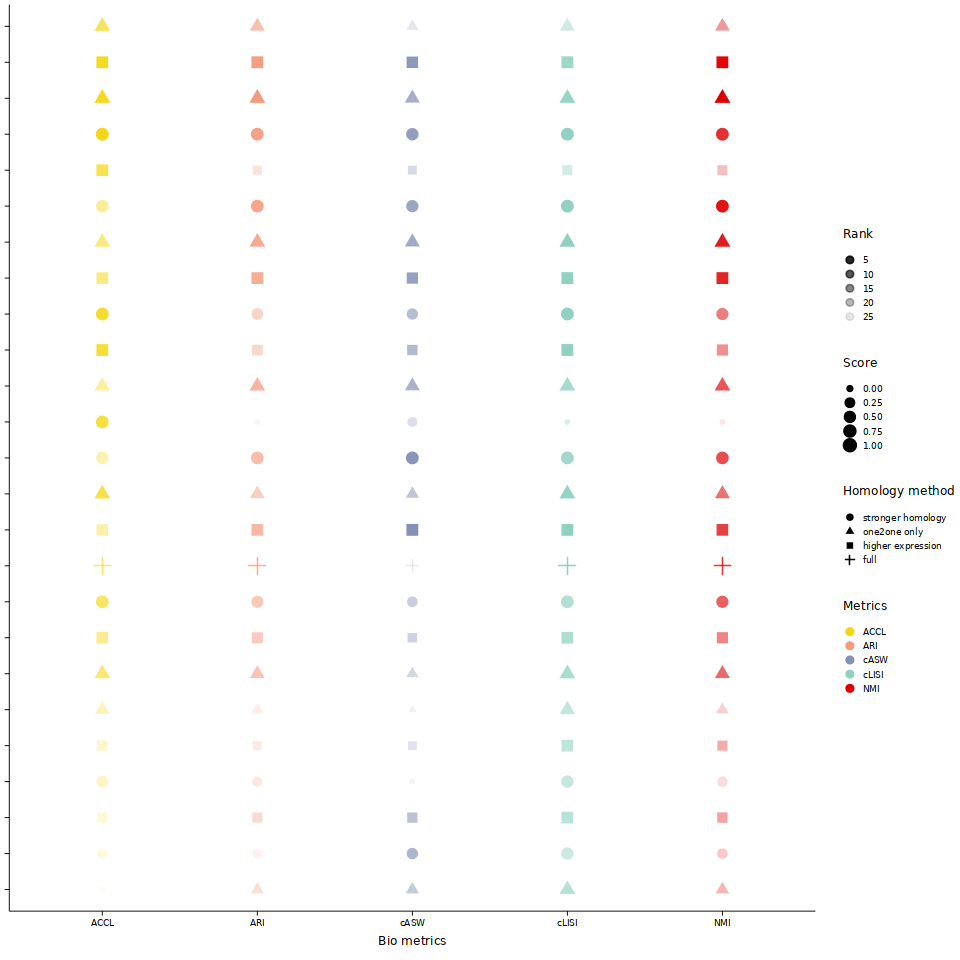

In [47]:
bio_ranking %>% 
pivot_longer(cols = (ends_with('rank')), names_to = 'Metrics', values_to = 'Rank') %>% 
mutate(Score = ifelse(grepl("cLISI", Metrics), cLISI_scaled, ifelse(grepl("NMI", Metrics), NMI_scaled, ifelse(grepl("ARI", Metrics), ARI_scaled, ifelse(grepl("silhouette", Metrics), silhouette_scaled, acc_loss_scaled))))) %>%
mutate(Metrics = gsub("cLISI_scaled_rank", "cLISI", Metrics)) %>% 
mutate(Metrics = gsub("silhouette_scaled_rank", "cASW", Metrics)) %>% 
mutate(Metrics = gsub("ARI_scaled_rank", "ARI", Metrics)) %>% 
mutate(Metrics = gsub("NMI_scaled_rank", "NMI", Metrics)) %>% 
mutate(Metrics = gsub("acc_loss_scaled_rank", "ACCL", Metrics)) %>%
ggplot(aes(x = factor(type, levels = order_type), y = Metrics, alpha = Rank, color = Metrics, size = Score)) + 
geom_point(aes(shape = fct_inorder(homology_method))) + coord_flip() + common_0x    +  
theme(axis.text.y = element_blank(), 
      axis.title.y = element_blank(),  
      panel.background = element_blank())  + 
scale_shape_discrete(name = 'Homology method') + 
scale_alpha_continuous(name = 'Rank', trans = reverse_trans()) +
scale_x_discrete(limits = rev) +
scale_size_continuous(name = 'Score', range = c(1, 3)) + labs(y = 'Bio metrics') +
scale_color_manual(name = 'Metrics', values = c("#F4D714", "#F39B7FFF", "#8491B4FF", "#91D1C2FF", "#DC0000FF"))

In [48]:
bio_detail = bio_ranking %>% 
pivot_longer(cols = (ends_with('rank')), names_to = 'Metrics', values_to = 'Rank') %>% 
mutate(Score = ifelse(grepl("cLISI", Metrics), cLISI_scaled, ifelse(grepl("NMI", Metrics), NMI_scaled, ifelse(grepl("ARI", Metrics), ARI_scaled, ifelse(grepl("silhouette", Metrics), silhouette_scaled, acc_loss_scaled))))) %>%
mutate(Metrics = gsub("cLISI_scaled_rank", "cLISI", Metrics)) %>% 
mutate(Metrics = gsub("silhouette_scaled_rank", "cASW", Metrics)) %>% 
mutate(Metrics = gsub("ARI_scaled_rank", "ARI", Metrics)) %>% 
mutate(Metrics = gsub("NMI_scaled_rank", "NMI", Metrics)) %>% 
mutate(Metrics = gsub("acc_loss_scaled_rank", "ACCL", Metrics)) %>%
ggplot(aes(x = factor(type, levels = order_type), y = Metrics, alpha = Rank, color = Metrics, size = Score)) + 
geom_point(aes(shape = fct_inorder(homology_method))) + coord_flip() + common_0x    +  
theme(axis.text.y = element_blank(), 
      axis.title.y = element_blank(),  
      panel.background = element_blank())  + 
scale_shape_discrete(name = 'Homology method', guide = 'none') + 
scale_alpha_continuous(name = 'Rank', trans = reverse_trans(), guide = 'none') +
scale_x_discrete(limits = rev) +
scale_size_continuous(name = 'Score', range = c(1, 3), guide = 'none') + labs(y = 'Bio metrics') +
scale_color_manual(name = 'Metrics', values = c("#F4D714", "#F39B7FFF", "#8491B4FF", "#91D1C2FF", "#DC0000FF"))

Warning message in as_grob.default(plot):
“Cannot convert object of class numeric into a grob.”


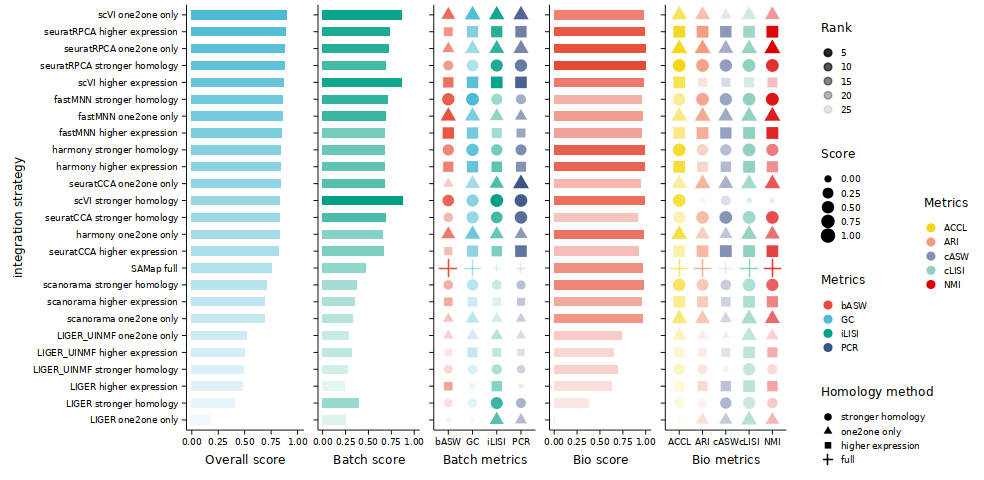

In [49]:
options(repr.plot.width = 8.2, repr.plot.height = 4)

plot_grid(overall, batch_overall,
          batch_detail  + theme(legend.position = 'none'), bio_overall, bio_detail  + theme(legend.position = 'none'), 0.1, 
          get_legend(batch_detail + theme(legend.spacing.y = unit(0.1, 'cm'), 
                                          legend.key.size = unit(0.3, "cm"))),  
          get_legend(bio_detail + theme(legend.background = element_blank(),
                                        legend.spacing.y = unit(0.1, 'cm'), 
                                          legend.key.size = unit(0.3, "cm"))),
          nrow = 1, rel_widths = c(0.8, 0.3, 0.3, 0.3, 0.35, 0.1, 0.2, 0.2))

In [50]:
getwd()

[1] "/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Baron_pancreas_results_final/batch_metrics/cross_species/analysis_batch"

In [51]:
pdf("baron_pancreas_summary_metrics.pdf", height  = 4, width = 8.2)



plot_grid(overall, batch_overall,
          batch_detail  + theme(legend.position = 'none'), bio_overall, bio_detail  + theme(legend.position = 'none'), 0.1, 
          get_legend(batch_detail + theme(legend.spacing.y = unit(0.1, 'cm'), 
                                          legend.key.size = unit(0.3, "cm"))),  
          get_legend(bio_detail + theme(legend.background = element_blank(),
                                        legend.spacing.y = unit(0.1, 'cm'), 
                                          legend.key.size = unit(0.3, "cm"))),
          nrow = 1, rel_widths = c(0.8, 0.3, 0.3, 0.3, 0.35, 0.1, 0.2, 0.2))



dev.off()


Warning message in as_grob.default(plot):
“Cannot convert object of class numeric into a grob.”


png 
  2

In [52]:
ranked %>% mutate(type = paste(integration_method, homology_method, sep = " ")) %>% distinct(type, .keep_all = TRUE) %>% 
select(iLISI_scaled, graph_conn_scaled, pcr_scaled, silhouette_batch_scaled, avg_score, type, homology_method,integration_method ) %>% 
ungroup() %>% 
mutate(iLISI_scaled_rank = dense_rank(desc(iLISI_scaled)))%>% 
mutate(graph_conn_scaled_rank = dense_rank(desc(graph_conn_scaled)))%>% 
mutate(pcr_scaled_rank = dense_rank(desc(pcr_scaled)))%>% 
mutate(silhouette_batch_scaled_rank = dense_rank(desc(silhouette_batch_scaled))) %>% write_csv("pancreas_hs_mm_batch_ranked.csv")

In [53]:
bio_ranking  %>% write_csv("pancreas_hs_mm_bio_ranked.csv")